#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import scipy.stats as stats

# Model Library
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

### Importing Dataset

Dataset used in this project is Telco Customer Churn Dataset. 

The target variable has two states (left company: yes/no or 1/0)
* Total Records : 7043 
* Independent Variables/ Features: 20
* Dependent (Target) Variables / Features : 1

In [2]:
data = pd.read_csv("Telco-Customer-Churn.csv")

**Prediction column:**
Churn: Whether the customer churned or not (Yes or No)

**Two numerical columns:**
1. MonthlyCharges: The amount charged to the customer monthly
2. TotalCharges: The total amount charged to the customer

**Eighteen categorical columns:**
1. CustomerID: Customer ID unique for each customer
2. gender: Whether the customer is a male or a female
3. SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
4. Partner: Whether the customer has a partner or not (Yes, No)
5. Dependents: Whether the customer has dependents or not (Yes, No)
6. Tenure: Number of months the customer has stayed with the company
7. PhoneService: Whether the customer has a phone service or not (Yes, No)
8. MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
9. InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
10. OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
11. OnlineBackup: Whether the customer has an online backup or not (Yes, No, No internet service)
12. DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
13. TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
14. StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
15. StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
16. Contract: The contract term of the customer (Month-to-month, One year, Two years)
17. PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
18. PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Scope of Work / Project Structure
1. Data Cleaning
2. Exploratory Data Analysis
3. Data Preprocessing
4. Model Creation
5. Improving the model

### Data Cleaning

Dropping the customerId column, since it has no value for the analysis.

In [6]:
data.drop(columns = ["customerID"], inplace = True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Changing total Charges column type to numerical

In [8]:
data["TotalCharges"] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')

In [9]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

11 missing values is present in “TotalCharges” column, after getting looking into the records having missing values it was found that all the records with tenure less than 1 month is having NaN values for “TotalCharges”, since for tenure less than 1 month total charges will be same as monthly charges hence imputing the missing “TotalCharges” field with corresponding “MonthlyCharges” will do the job.

In [10]:
data['TotalCharges'] = np.where(data['TotalCharges'].isnull(), data['MonthlyCharges'], data['TotalCharges'])

## Exploratory Data Analysis

### Univariate Analysis

Target Variable Class Distribution

Churn distribution

No     73.46
Yes    26.54
Name: Churn, dtype: float64


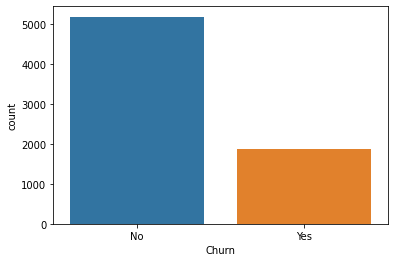

In [11]:
ax = sns.countplot(x = "Churn", data=data)
print("Churn distribution\n")
print(round(data['Churn'].value_counts()/data.shape[0]*100,2))

### Independent Features Distribution
#### Categorical Features

Class distribution for gender is

Male      50.0
Female    50.0
Name: gender, dtype: float64 

Class distribution for SeniorCitizen is

0    84.0
1    16.0
Name: SeniorCitizen, dtype: float64 

Class distribution for Partner is

No     52.0
Yes    48.0
Name: Partner, dtype: float64 

Class distribution for Dependents is

No     70.0
Yes    30.0
Name: Dependents, dtype: float64 

Class distribution for PhoneService is

Yes    90.0
No     10.0
Name: PhoneService, dtype: float64 

Class distribution for MultipleLines is

No                  48.0
Yes                 42.0
No phone service    10.0
Name: MultipleLines, dtype: float64 

Class distribution for InternetService is

Fiber optic    44.0
DSL            34.0
No             22.0
Name: InternetService, dtype: float64 

Class distribution for OnlineSecurity is

No                     50.0
Yes                    29.0
No internet service    22.0
Name: OnlineSecurity, dtype: float64 

Class distribution for OnlineBackup is

No             

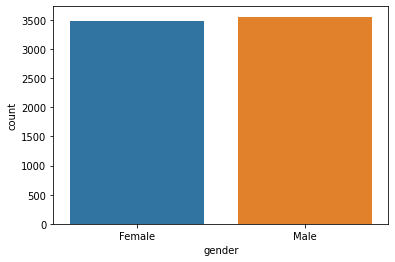

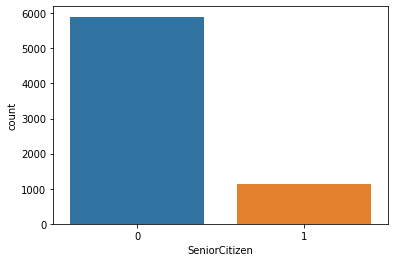

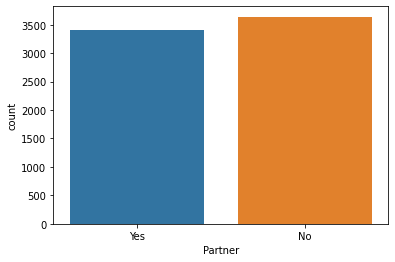

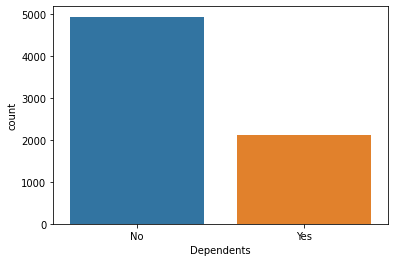

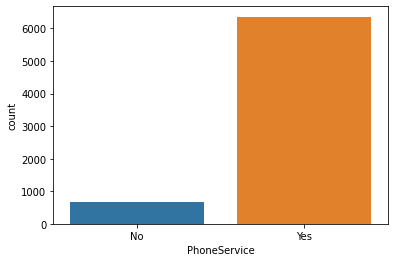

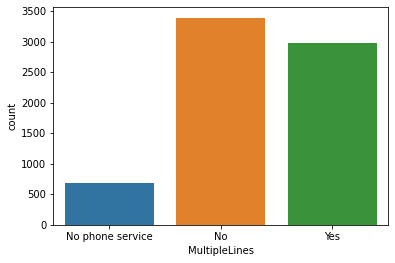

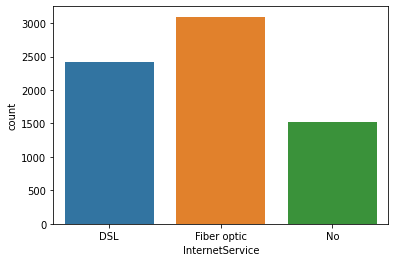

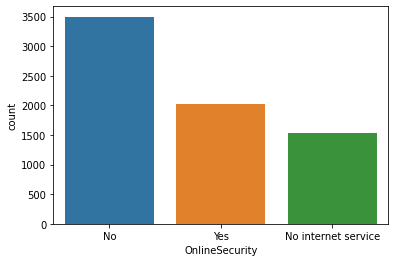

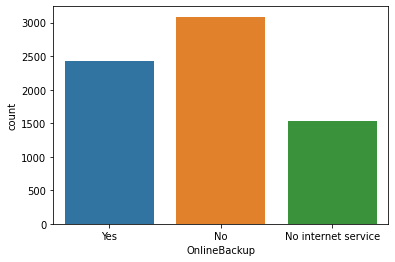

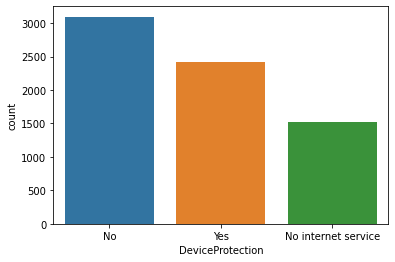

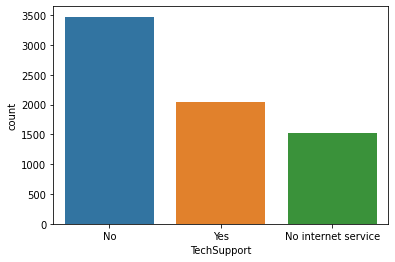

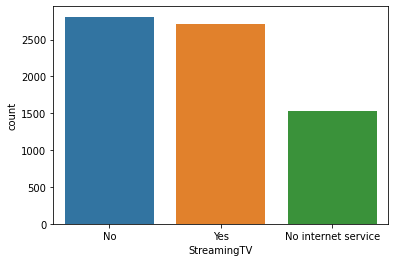

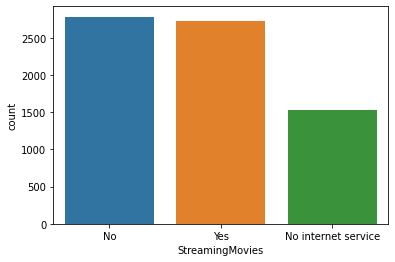

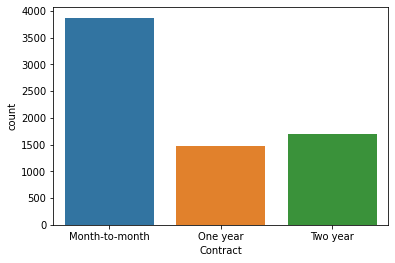

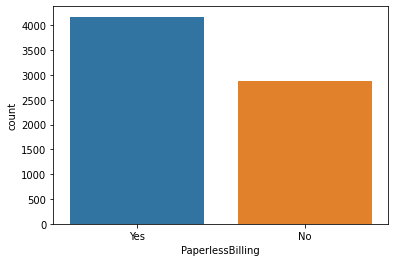

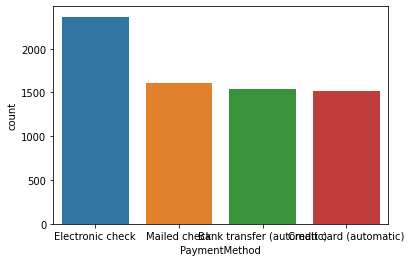

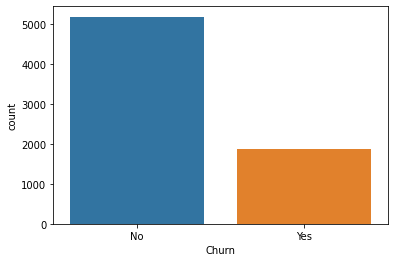

In [12]:
# removing numerical features out of analysis.
features = data.columns.values.tolist()
num_feature = ['tenure','MonthlyCharges','TotalCharges']
for feature in num_feature:
    features.remove(feature)
for i, feature in enumerate(features):
    plt.figure(i)
    ax = sns.countplot(x=feature, data=data)
    print("Class distribution for %s is\n"%feature)
    print(round(data[feature].value_counts()/data.shape[0]*100,0), "\n")

#### Numerical Features

Tenure: Dividing the customer based on the tenure into equal size bin of 12 months

In [13]:
labels = []
b = data['tenure'].max()
a = data['tenure'].min()
for i in range(a,b,12):
        labels.append("{} - {}".format(i, i+12))
data["tenure_class"] = pd.cut(data['tenure'], range(a,b+12,12), labels = labels, right = False)
round(data['tenure_class'].value_counts()/data.shape[0]*100,0)

0 - 12     29.0
60 - 72    16.0
12 - 24    15.0
24 - 36    12.0
48 - 60    12.0
36 - 48    11.0
Name: tenure_class, dtype: float64

### Bi-Variate Analysis

### Correlation between Numerical features

In [14]:
data[['tenure','MonthlyCharges','TotalCharges']].corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.826164
MonthlyCharges,0.247900,1.000000,0.651182
TotalCharges,0.826164,0.651182,1.000000


<AxesSubplot:>

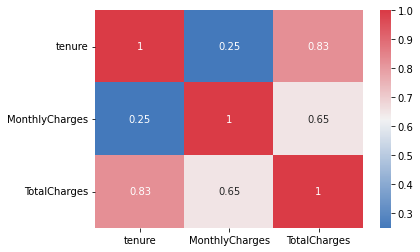

In [15]:
# plot the heatmap
corr = data[['tenure','MonthlyCharges','TotalCharges']].corr()
sns.heatmap(corr, 
            cmap = sns.diverging_palette(250, 10, as_cmap=True),
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True)

Tenure and Total Charges has strong correlation which can be observed from the scatterplot;

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

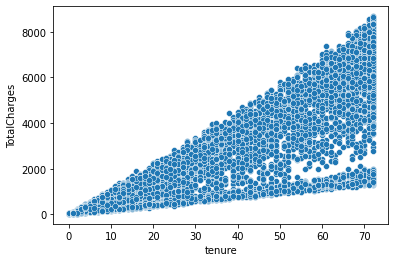

In [16]:
sns.scatterplot(data=data, x="tenure", y="TotalCharges")

##### Distribution Plot between Categorical features & Numerical Features

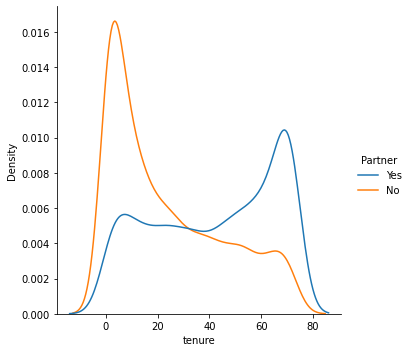

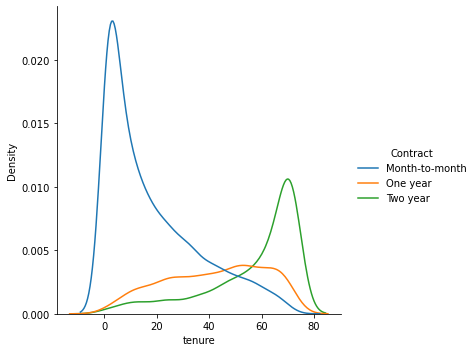

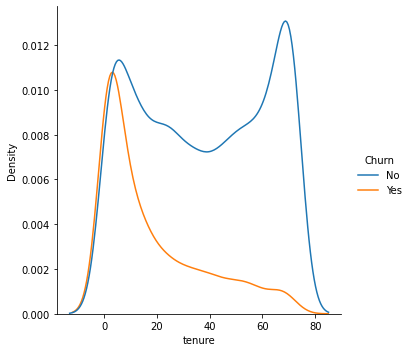

In [17]:
sns.displot(data=data, x="tenure", hue='Partner', kind="kde")
sns.displot(data=data, x="tenure", hue='Contract', kind="kde")
sns.displot(data=data, x="tenure", hue='Churn', kind="kde")

1. People having partner have long history of service experience than without which may further translate that people with partner prefer to stay more long tenure than without.
2. Customer who are enrolled in monthly contract have very short tenure in comparison to 1 year and 2 years contract, reason for this might be people with monthly contract are less bound to service provider hence more likely to leave the service if given better option while yearly contract (1 yr & 2 yrs) customer enjoy less freedom in term of switching to another service provider.
3. People with short tenure high churn rate than long term customer.

In [18]:
round(pd.crosstab(data['SeniorCitizen'], data['Churn'],  normalize='index')*100,0)

Churn,No,Yes
SeniorCitizen,,
0,76.0,24.0
1,58.0,42.0


In [19]:
round(pd.crosstab(data['Partner'], data['Churn'],  normalize='index')*100,0)

Churn,No,Yes
Partner,,
No,67.0,33.0
Yes,80.0,20.0


In [20]:
round(pd.crosstab(data['Contract'], data['Churn'],  normalize='index')*100,0)

Churn,No,Yes
Contract,,
Month-to-month,57.0,43.0
One year,89.0,11.0
Two year,97.0,3.0


### Chi Square Test

To check which categorical variable has much influence over target variable ‘Churn’, we can perform ‘Chi Square test of Independence’. Features which are dependent of ‘Churn’ variable will define churn rate more significantly than those which are independent of the ‘Churn’ variable.

In [21]:
Chi_test_feature = data.columns.values.tolist()
Chi_num_feature = ['tenure','MonthlyCharges','TotalCharges','tenure_class','Churn']
for feature in Chi_num_feature:
    Chi_test_feature.remove(feature)
    
Features = []
P_value = []
for Chi_feature in Chi_test_feature:
    table = round(pd.crosstab(data[Chi_feature], data['Churn'],  normalize='index')*100,0)
    stat, p, dof, expected = chi2_contingency(table)
    Features.append(Chi_feature)
    P_value.append(p)

Chi_df = pd.DataFrame(list(zip(Features, P_value)), columns = ['CHI SQUARE Feature', 'CHI SQUARE P Value'])
Chi_df.sort_values('CHI SQUARE P Value')

,CHI SQUARE Feature,CHI SQUARE P Value
13,Contract,2.279132e-13
7,OnlineSecurity,1.978259e-09
10,TechSupport,1.978259e-09
6,InternetService,1.453946e-08
8,OnlineBackup,2.019956e-07
15,PaymentMethod,3.770492e-07
9,DeviceProtection,5.275036e-07
11,StreamingTV,7.861836e-06
12,StreamingMovies,7.861836e-06
14,PaperlessBilling,5.501725e-03


### Anova
With the help of ANOVA test we can filter those categorical features which explains most of the variance of target variable.

In [22]:
# Converting Senior Citizen into Categorical Variable before applying ANOVA Test
data['SeniorCitizen'].replace(1, "Yes", inplace = True)
data['SeniorCitizen'].replace(0, "No", inplace = True)

ANOVA_feature = data.columns.values.tolist()
ANOVA_num_feature = ['tenure','MonthlyCharges','TotalCharges','tenure_class','Churn', 'gender',
                     'InternetService','PaymentMethod','Contract']
for feature in ANOVA_num_feature:
    ANOVA_feature.remove(feature)

P_value = []
Feature_name = []
for ANOVA in ANOVA_feature:
    ANOVA_test = data[data[ANOVA] == "Yes"]
    ANOVA_test = ANOVA_test.loc[:, ['Churn']]
    A = np.where(ANOVA_test == "Yes", 1, 0)
    ANOVA_test = data[data[ANOVA] == "No"]
    ANOVA_test = ANOVA_test.loc[:, ['Churn']]
    B = np.where(ANOVA_test == "Yes", 1, 0)
    fvalue, pvalue = stats.f_oneway(A, B)
    P_value.append(pvalue)
    Feature_name.append(ANOVA)
    
gender = data[data['gender'] == "Male"]
gender = gender.loc[:, ['Churn']]
A = np.where(gender == "Yes", 1, 0)
gender = data[data["gender"] == "Female"]
gender = gender.loc[:, ['Churn']]
B = np.where(gender == "Yes", 1, 0)
fvalue, pvalue = stats.f_oneway(A, B)
P_value.append(pvalue)
Feature_name.append('gender')

InternetService = data[data['InternetService'] == "Fiber optic"]
InternetService = InternetService.loc[:, ['Churn']]
A = np.where(InternetService == "Yes", 1, 0)
InternetService = data[data["InternetService"] == "DSL"]
InternetService = InternetService.loc[:, ['Churn']]
B = np.where(InternetService == "Yes", 1, 0)
InternetService = data[data["InternetService"] == "No"]
InternetService = InternetService.loc[:, ['Churn']]
C = np.where(InternetService == "Yes", 1, 0)
fvalue, pvalue = stats.f_oneway(A, B, C)
P_value.append(pvalue)
Feature_name.append('InternetService')

Contract = data[data['Contract'] == "Month-to-month"]
Contract = Contract.loc[:, ['Churn']]
A = np.where(Contract == "Yes", 1, 0)
Contract = data[data["Contract"] == "Two year"]
Contract = Contract.loc[:, ['Churn']]
B = np.where(Contract == "Yes", 1, 0)
Contract = data[data["Contract"] == "One year"]
Contract = Contract.loc[:, ['Churn']]
C = np.where(Contract == "Yes", 1, 0)
fvalue, pvalue = stats.f_oneway(A, B, C)
P_value.append(pvalue)
Feature_name.append('Contract')

PaymentMethod = data[data['PaymentMethod'] == "Electronic check"]
PaymentMethod = PaymentMethod.loc[:, ['Churn']]
A = np.where(PaymentMethod == "Yes", 1, 0)
PaymentMethod = data[data['PaymentMethod'] == "Mailed check"]
PaymentMethod = PaymentMethod.loc[:, ['Churn']]
B = np.where(PaymentMethod == "Yes", 1, 0)
PaymentMethod = data[data['PaymentMethod'] == "Bank transfer (automatic)"]
PaymentMethod = PaymentMethod.loc[:, ['Churn']]
C = np.where(PaymentMethod == "Yes", 1, 0)
PaymentMethod = data[data['PaymentMethod'] == "Credit card (automatic)"]
PaymentMethod = PaymentMethod.loc[:, ['Churn']]
D = np.where(PaymentMethod == "Yes", 1, 0)
fvalue, pvalue = stats.f_oneway(A, B, C, D)
P_value.append(pvalue)
Feature_name.append('PaymentMethod')
ANOVA_df = pd.DataFrame(list(zip(Feature_name, P_value)), columns = ['ANOVA Feature', 'ANOVA P Value'])
ANOVA_df.sort_values('ANOVA P Value')

,ANOVA Feature,ANOVA P Value
14,Contract,[2.9921663019905003e-282]
13,InternetService,[1.457260455919398e-168]
15,PaymentMethod,[5.583595720582596e-147]
5,OnlineSecurity,[1.6314797439339531e-100]
8,TechSupport,[6.755162959270331e-96]
11,PaperlessBilling,[2.3565543205872124e-59]
6,OnlineBackup,[6.225925993543879e-49]
2,Dependents,[9.140432989108222e-44]
7,DeviceProtection,[4.044837139187934e-40]
0,SeniorCitizen,[3.839860055793829e-37]


Result of the above Chi Square Test and ANOVA test illustrate that following features are insignificant since these statistical test doesn’t find strong evidence to reject Null Hypothesis:

* SeniorCitizen
* MultipleLines
* gender
* PhoneService
* StreamingTV
* StreamingMovie

### Data Preprocessing

In [23]:
data = pd.get_dummies(data)

In [24]:
data.drop(columns = ['gender_Female', 'SeniorCitizen_No', 'Partner_No', 'Dependents_No', 'PhoneService_No', 'MultipleLines_No', 'InternetService_No', 'OnlineSecurity_No', 'OnlineBackup_No', 'DeviceProtection_No', 'TechSupport_No', 'StreamingTV_No', 'StreamingMovies_No', 'Contract_Two year', 'PaperlessBilling_No','PaymentMethod_Mailed check', 'Churn_No'], inplace = True)

In [25]:
x = data.drop(columns = ['Churn_Yes'])
y = data['Churn_Yes']

### Class Balancing
 SMOTE technique to make dataset balance with respect to ‘Churn’ variable.

In [26]:
x.shape

(7043, 36)

In [27]:
sm = SMOTE()
x_resampled, y_resampled = sm.fit_resample(x,y)

In [28]:
y_resampled.shape

(10348,)

Churn distribution

1    50.0
0    50.0
Name: Churn_Yes, dtype: float64


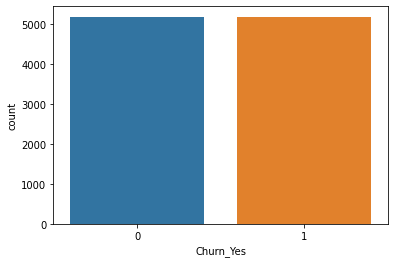

In [29]:
y_resampled_data = pd.DataFrame(y_resampled, columns=['Churn_Yes'])
ax = sns.countplot(x = "Churn_Yes", data=y_resampled_data)
print("Churn distribution\n")
print(round(y_resampled_data['Churn_Yes'].value_counts()/y_resampled_data.shape[0]*100,2))

In [30]:
xr_train,xr_test,yr_train,yr_test=train_test_split(x_resampled, y_resampled,test_size=0.2)

### Model

#### Depth of Decision Tree

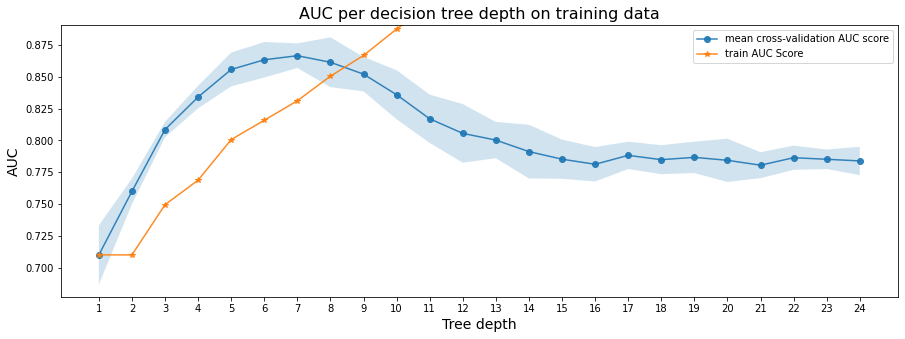

In [31]:
def run_cross_validation_on_trees(x_train, y_train, tree_depths, cv=5, scoring='roc_auc'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    AUC_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, x_train, y_train, cv=5, scoring='roc_auc')
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        tree_model.fit(x_train, y_train)    
        train_pred = tree_model.predict(x_train)
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        AUC_scores.append(roc_auc)
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    AUC_scores = np.array(AUC_scores)
    return cv_scores_mean, cv_scores_std, AUC_scores

def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, AUC_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation AUC score', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, AUC_scores, '-*', label='train AUC Score', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('AUC', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_AUC_scores = run_cross_validation_on_trees(xr_train, yr_train, sm_tree_depths)
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_AUC_scores, 
                               'AUC per decision tree depth on training data')

#### Minimum No of Sample at Leaf Node

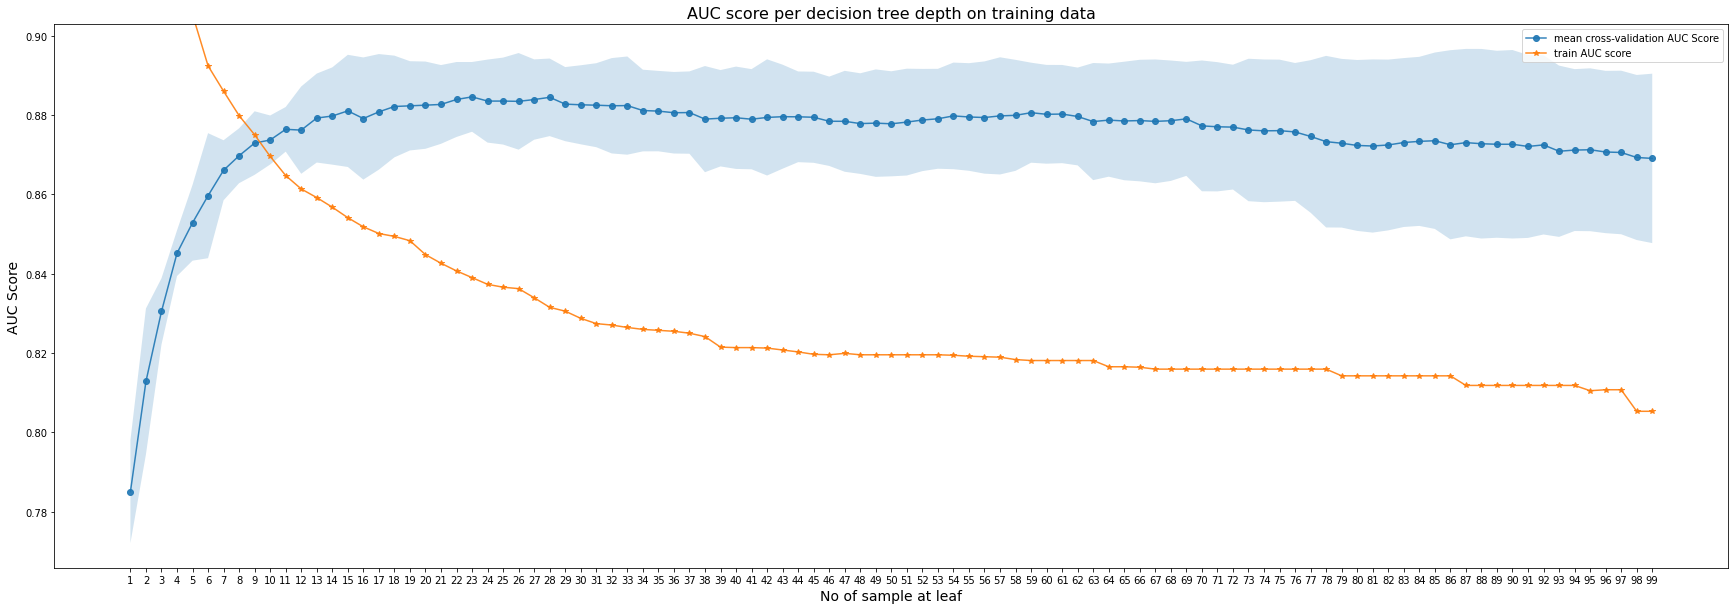

In [32]:
def run_cross_validation_on_trees(x_train, y_train, sample_leaf, cv=5, scoring='roc_auc'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    AUC_scores = []
    for sample_leaf in sample_leaf:
        tree_model = DecisionTreeClassifier(min_samples_leaf=sample_leaf)
        cv_scores = cross_val_score(tree_model, x_train, y_train, cv=5, scoring='roc_auc')
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        tree_model.fit(x_train, y_train)    
        train_pred = tree_model.predict(x_train)
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        AUC_scores.append(roc_auc)
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    AUC_scores = np.array(AUC_scores)
    return cv_scores_mean, cv_scores_std, AUC_scores

def plot_cross_validation_on_trees(sample_leaf, cv_scores_mean, cv_scores_std, AUC_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(30,10))
    ax.plot(sample_leaf, cv_scores_mean, '-o', label='mean cross-validation AUC Score', alpha=0.9)
    ax.fill_between(sample_leaf, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(sample_leaf, AUC_scores, '-*', label='train AUC score', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('No of sample at leaf', fontsize=14)
    ax.set_ylabel('AUC Score', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(sample_leaf)
    ax.legend()
sm_sample_leaf = range(1,100)
sm_cv_scores_mean, sm_cv_scores_std, sm_AUC_scores = run_cross_validation_on_trees(xr_train, yr_train, sm_sample_leaf)
plot_cross_validation_on_trees(sm_sample_leaf, sm_cv_scores_mean, sm_cv_scores_std, sm_AUC_scores, 
                               'AUC score per decision tree depth on training data')

In [33]:
model_dt=DecisionTreeClassifier(criterion = "gini",class_weight = "balanced", random_state = 100,max_depth=4,min_samples_leaf=30)
model_dt.fit(xr_train,yr_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4,
                       min_samples_leaf=30, random_state=100)

In [34]:
test_pred = model_dt.predict(xr_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(yr_test, test_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(f"AUC value for Decision Tree Model after SMOTE Sampling is {round(roc_auc*100,0)}%\n\n")
print(classification_report(yr_test,test_pred, labels=[0,1]))

AUC value for Decision Tree Model after SMOTE Sampling is 75.0%


              precision    recall  f1-score   support

           0       0.77      0.73      0.75      1034
           1       0.74      0.78      0.76      1036

    accuracy                           0.75      2070
   macro avg       0.75      0.75      0.75      2070
weighted avg       0.75      0.75      0.75      2070



#### Random Forest Classifier

In [35]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth= 4, min_samples_leaf= 30)
model_rf.fit(xr_train,yr_train)
test_pred = model_rf.predict(xr_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(yr_test, test_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(f"AUC value for Random Forest Model after SMOTE Sampling is {round(roc_auc*100,0)}%\n\n")
print(classification_report(yr_test,test_pred, labels=[0,1]))

AUC value for Random Forest Model after SMOTE Sampling is 80.0%


              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1034
           1       0.78      0.83      0.80      1036

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



#### Feature Engineering

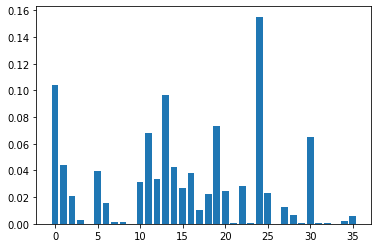

,Feature,Importance Value
24,Contract_Month-to-month,0.155330
0,tenure,0.104068
13,OnlineSecurity_Yes,0.096458
19,TechSupport_Yes,0.073463
11,InternetService_Fiber optic,0.068015
30,tenure_class_0 - 12,0.065139
1,MonthlyCharges,0.043825
14,OnlineBackup_No internet service,0.042232
5,Partner_Yes,0.039265
16,DeviceProtection_No internet service,0.038199


In [36]:
features = x.columns.values.tolist()
importance = model_rf.feature_importances_
plt.bar([x for x in range(len(importance))], importance)
plt.show()
df = pd.DataFrame(list(zip(features, importance)), columns = ['Feature', 'Importance Value'])
df.sort_values('Importance Value', ascending= False)